<a href="https://colab.research.google.com/github/savka777/Heart-Disease-Prediction-Model-/blob/main/Lovelace_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
#read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [ ]:
#preview data
df.head()

# Rename origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

print(df.columns)

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bs', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')


In [ ]:
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.describe()


,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   Resting_bp               270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   Fasting_bs               270 non-null    int64  
 6   Resting_ecg              270 non-null    int64  
 7   Max_heart_rate           270 non-null    int64  
 8   Exercise_induced_angina  270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  ST_slope                 270 non-null    int64  
 11  Num_major_vessels        270 non-null    int64  
 12  Thallium_test            270 non-null    int64  
 13  Condition                270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
# Check missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bs', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')

In [ ]:
df['Condition'].value_counts()

Absence     150
Presence    120
Name: Condition, dtype: int64

This function is responsible for creating a pie chart in relation to the presence and absense of heart diesease in our given data set.

The Pie chart states that the presence of heart disease is found in a set of 120 people, while the absense remains in the rest, 150 people.



In [ ]:
def condition_ratio(df):
    results = df['Condition'].value_counts()

    values = [results[0], results[1]]
    print('Presence of Heart Disease: ',results[1],'Absence of Heart Disease: ', results[0])
    labels = ['Absence', 'Presence']
    colors = ['Blue', 'Red']
    title = ['The % of Heart Disease present in Data Set']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


In [ ]:
condition_ratio(df)

Presence of Heart Disease:  120 Absence of Heart Disease:  150


<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

In [ ]:
def sex_ratio(df):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = df['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


In [ ]:
sex_ratio(df);

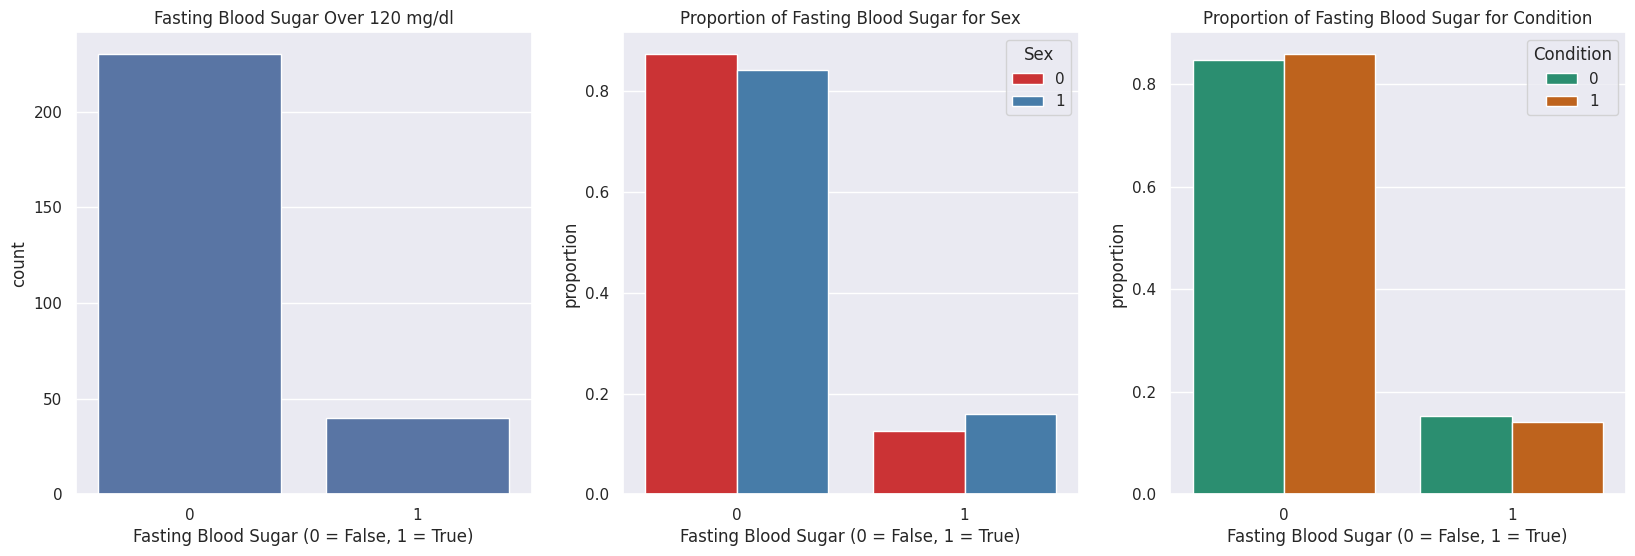

In [ ]:
def risk_factors_fbs(data):
    """
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(20, 6))

    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting Blood Sugar Over 120 mg/dl')
    plt.xlabel('Fasting Blood Sugar (0 = False, 1 = True)')


    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting Blood Sugar for Sex')
    plt.xlabel('Fasting Blood Sugar (0 = False, 1 = True)')


    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting Blood Sugar for Condition')
    plt.xlabel('Fasting Blood Sugar (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df);

<ipython-input-16-df33e25b1aa9>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-df33e25b1aa9>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-df33e25b1aa9>:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

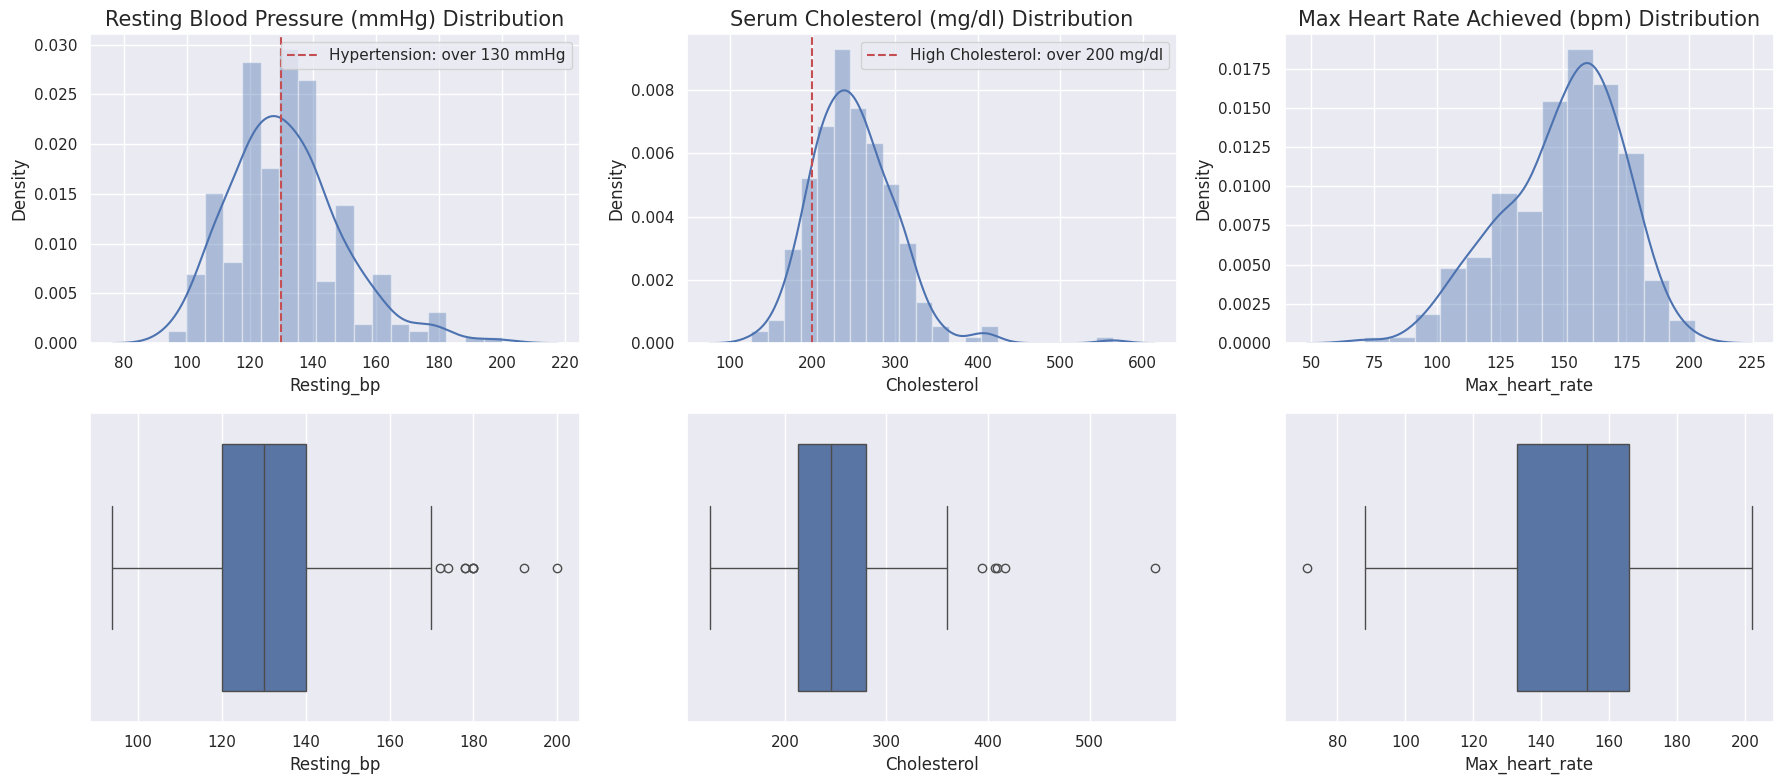

In [ ]:
def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_bp, Chlesterol, and Max_heart_rate
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(data['Resting_bp'])
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')


    # Serum cholesterol
    plt.subplot(2, 3, 2)
    sns.distplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')


    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()


risk_factors_dist(df);

<ipython-input-17-e43a814a4762>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-17-e43a814a4762>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-17-e43a814a4762>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` v

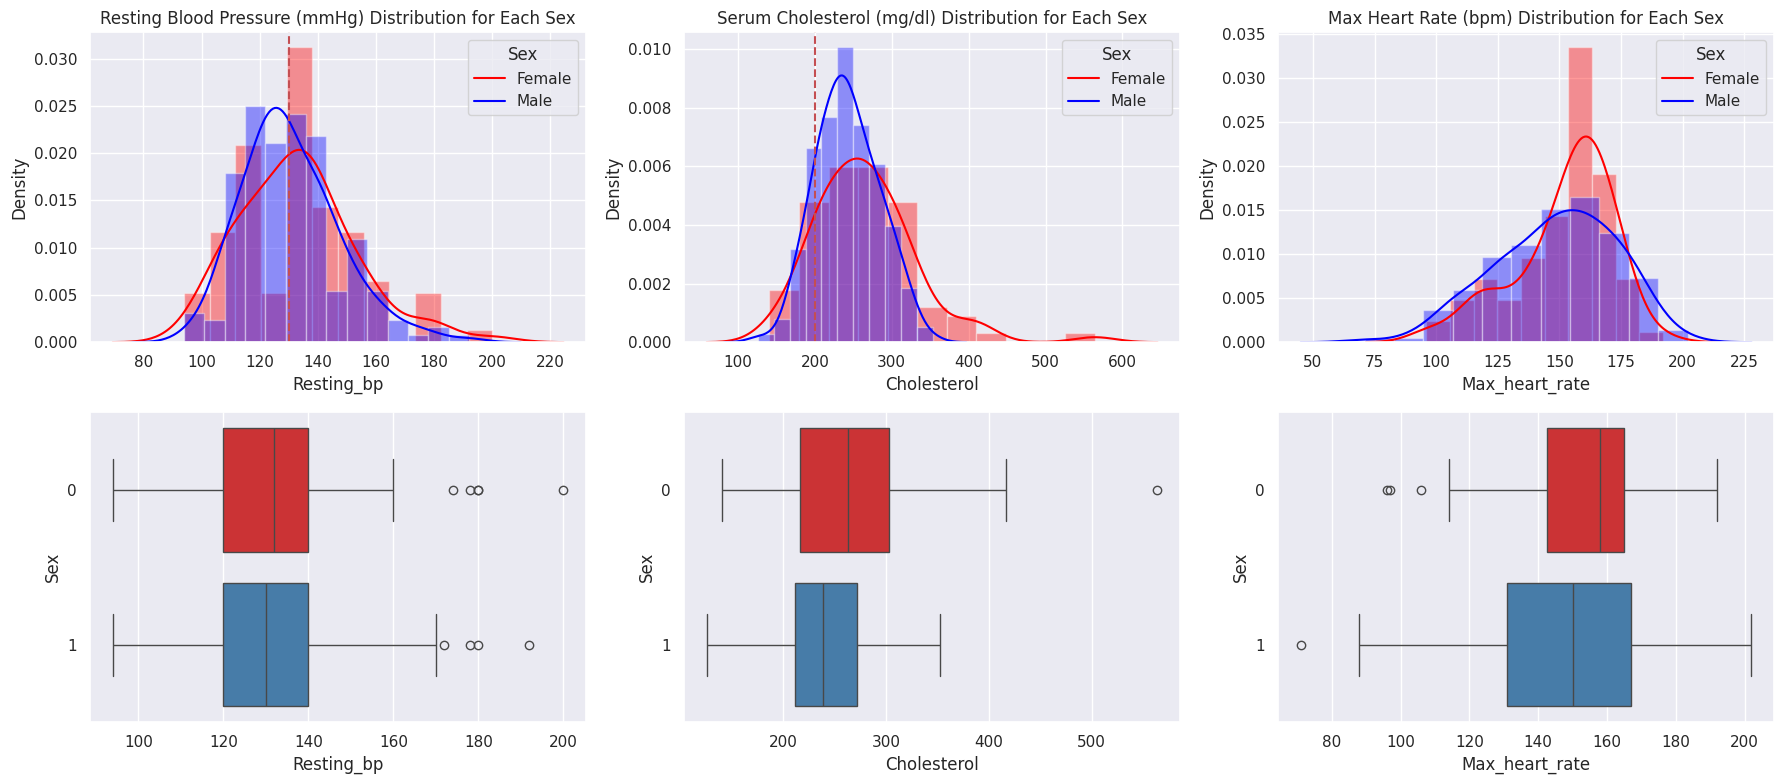

In [ ]:
def risk_factors_dist_sex(data):
    """
    Show distributions of risk factors for each sex
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.distplot(trestbps_female, color='Red')
    sns.distplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'],
                palette='Set1', orient='h')


    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')


    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.distplot(thalach_female, color='Red')
    sns.distplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'],
                palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()


risk_factors_dist_sex(df);

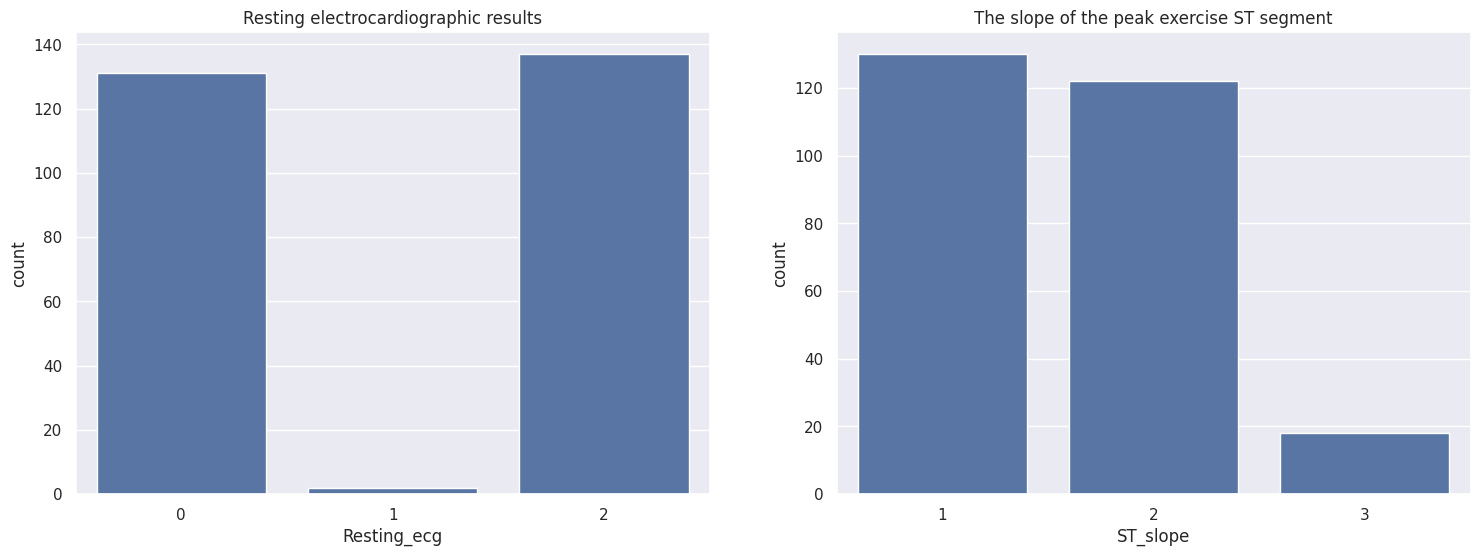

In [ ]:
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()


heart_functions(df);

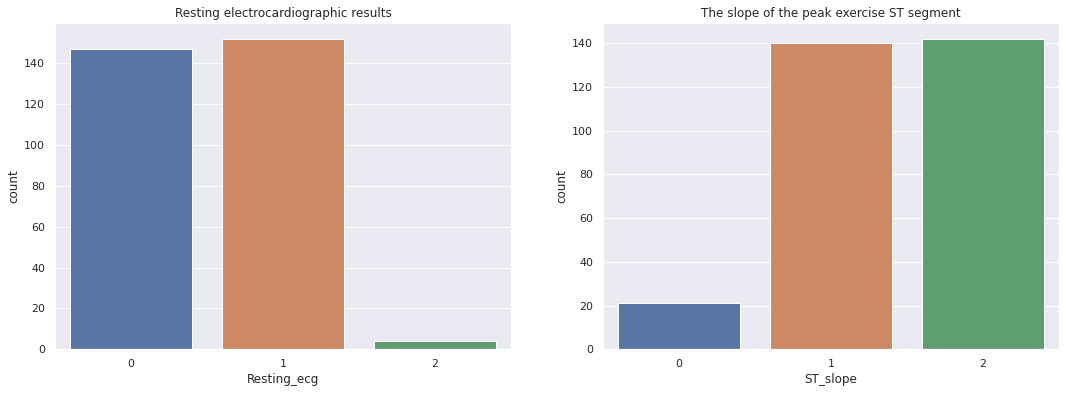

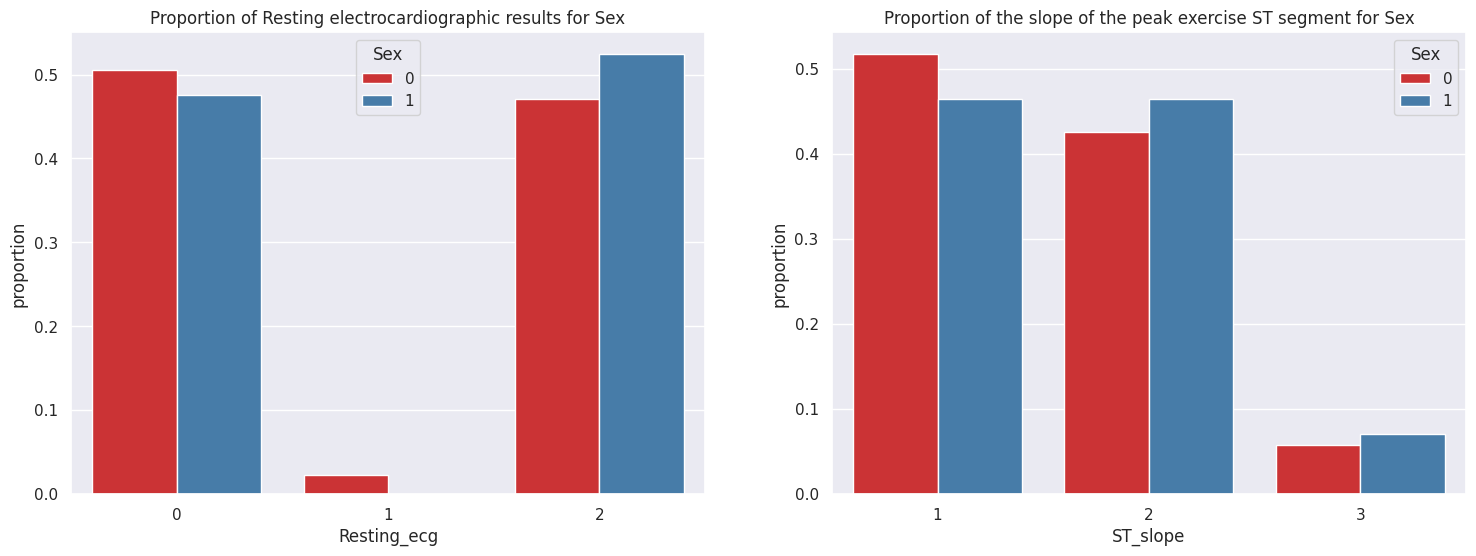

In [ ]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()


heart_functions_sex(df);

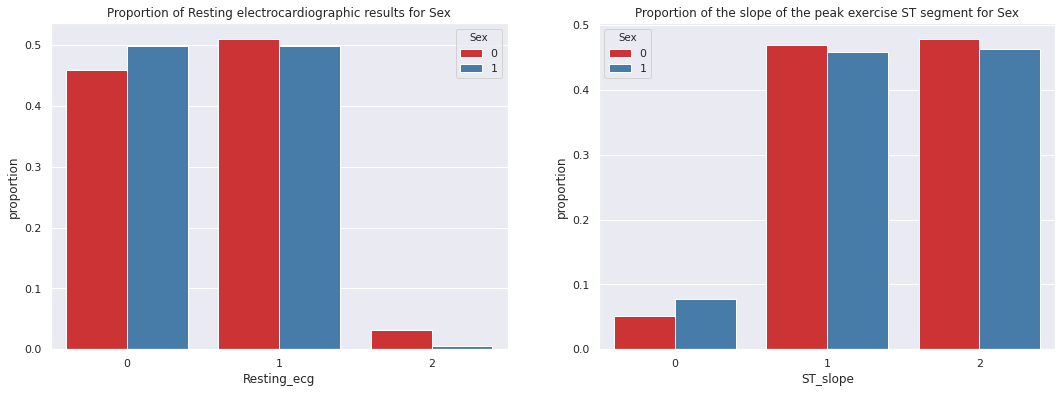

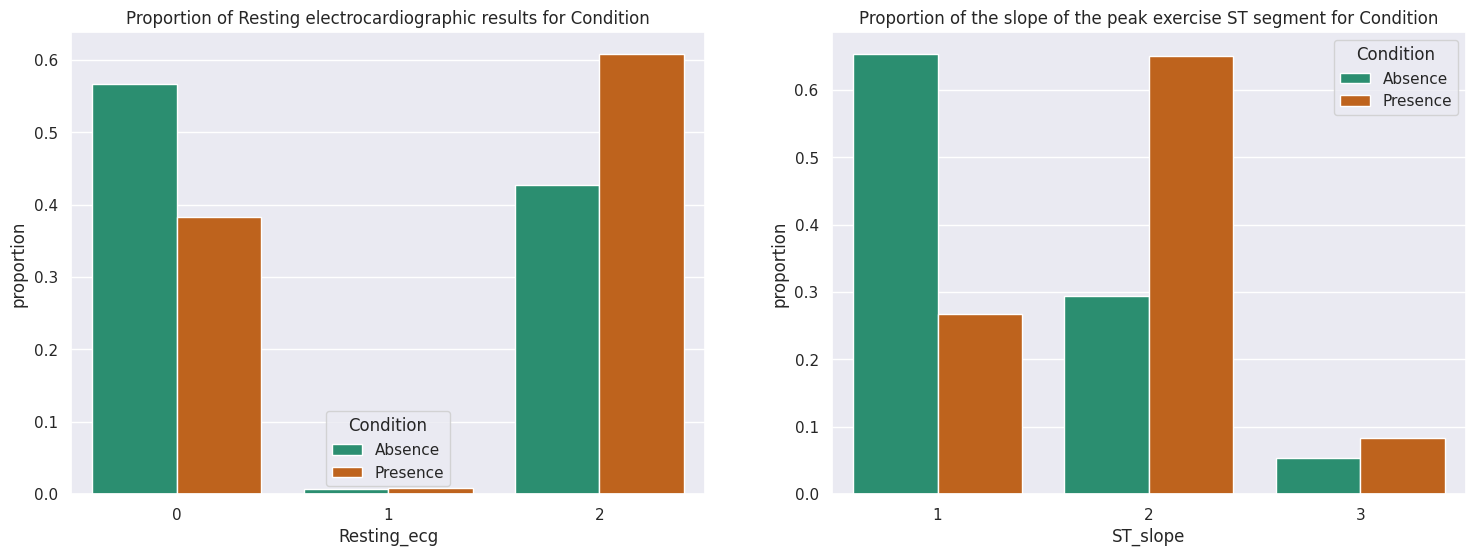

In [ ]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_condition(df);


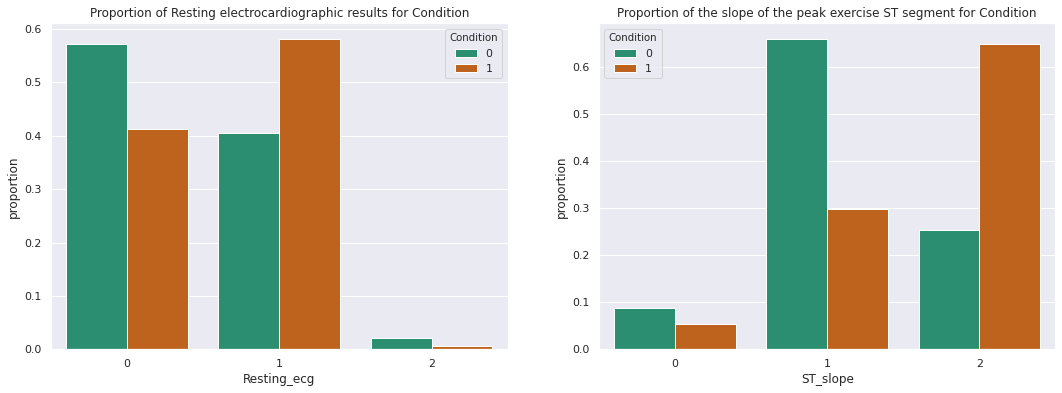

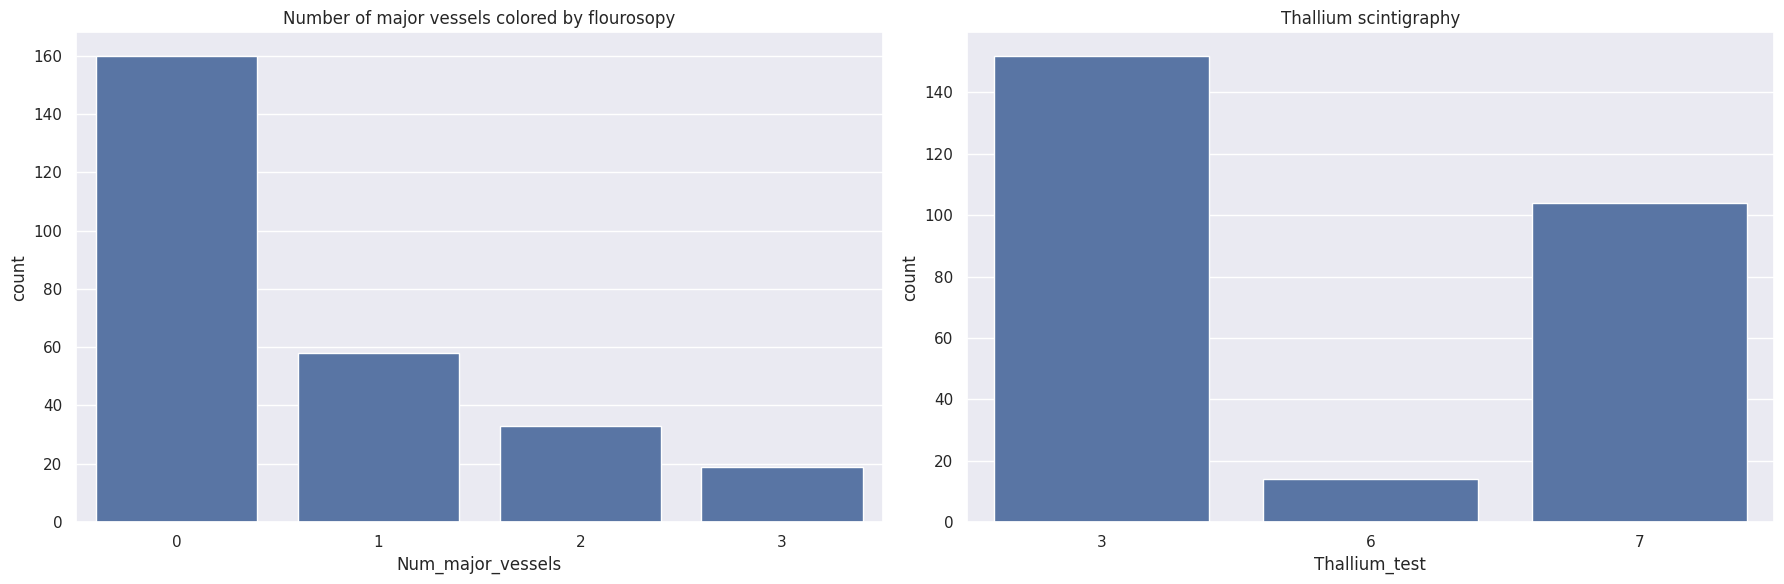

In [ ]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

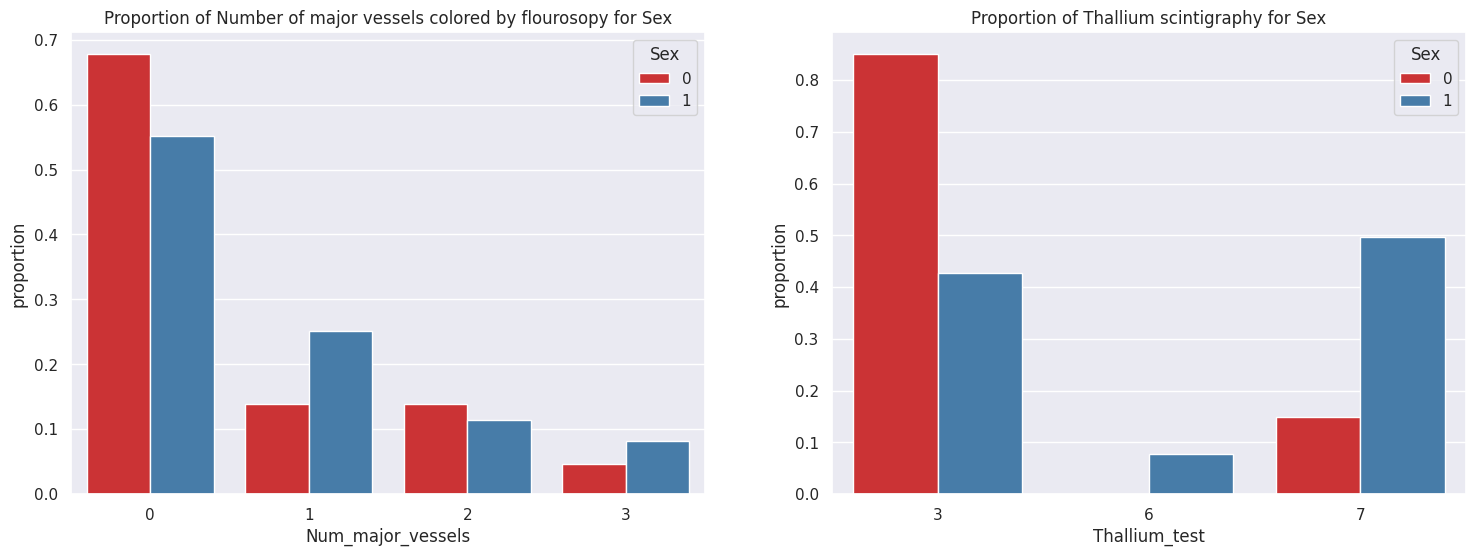

In [ ]:
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

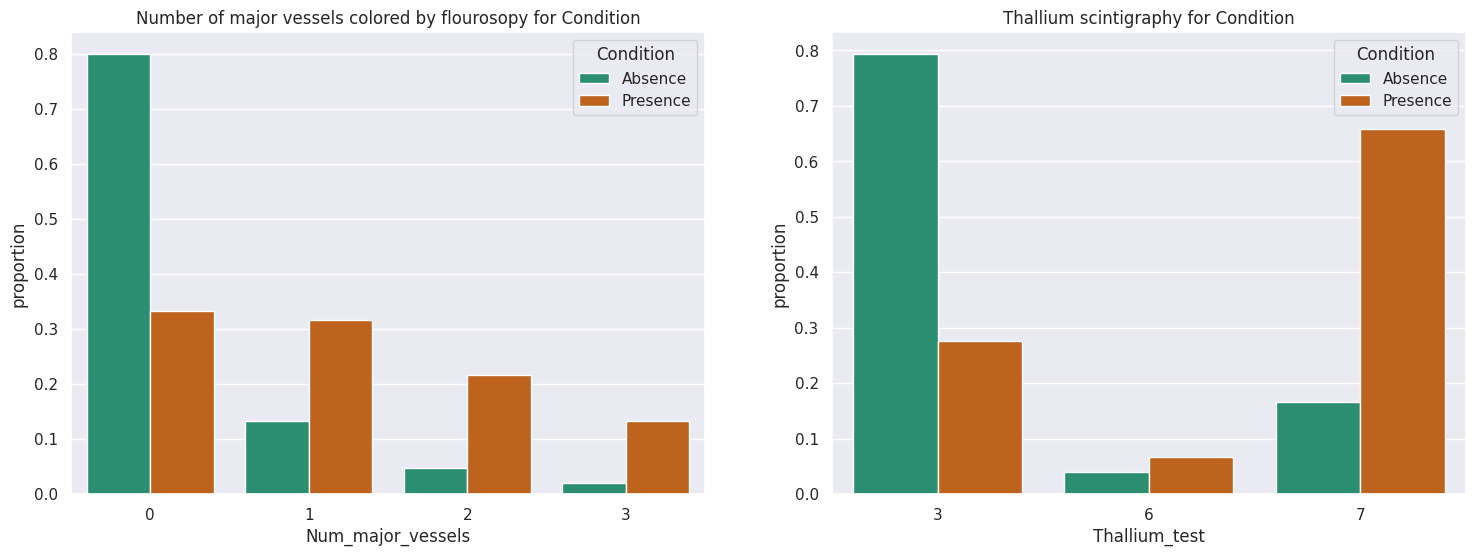

In [ ]:
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()


heart_functions2_condition(df);

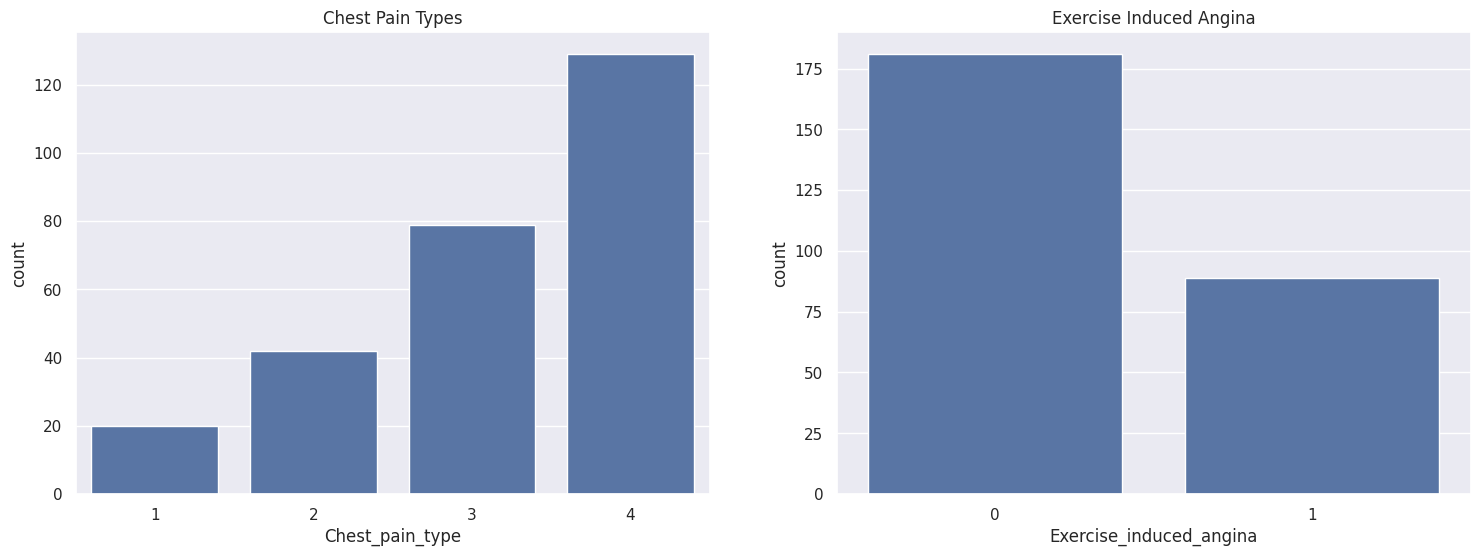

In [ ]:
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))

    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')


symptoms_features(df);

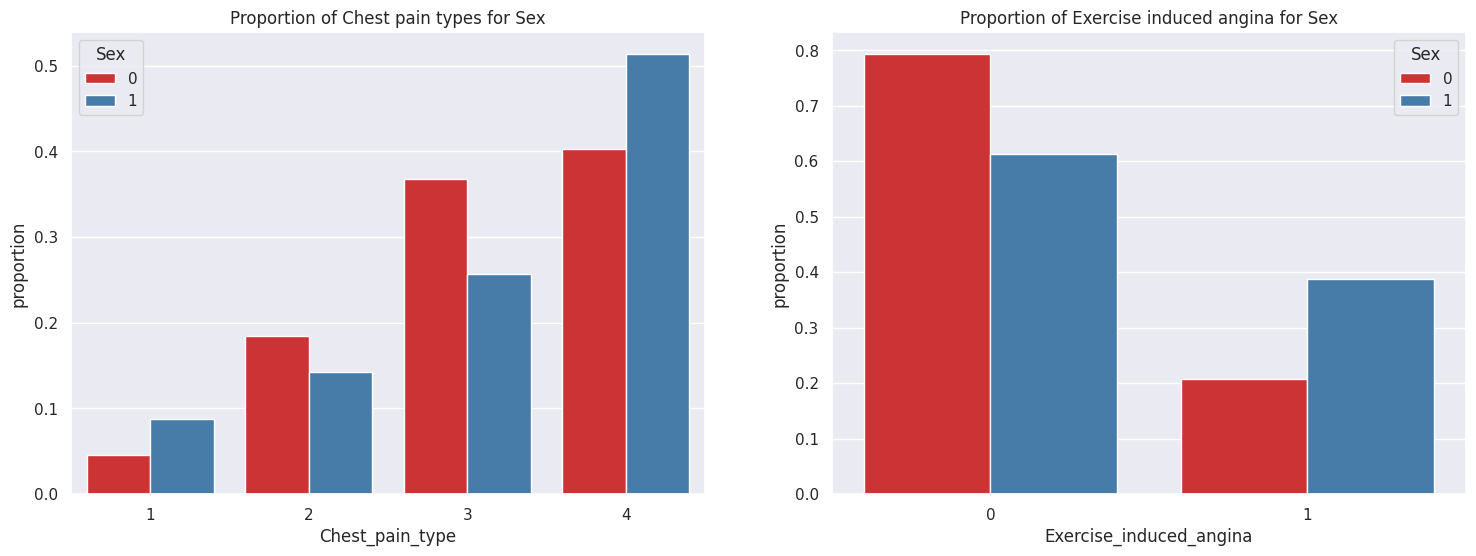

In [ ]:
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))

    # Chest pain types for Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types for Sex')


    # Exercise induced angina for Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Sex')
    plt.show()


symptoms_features_sex(df);

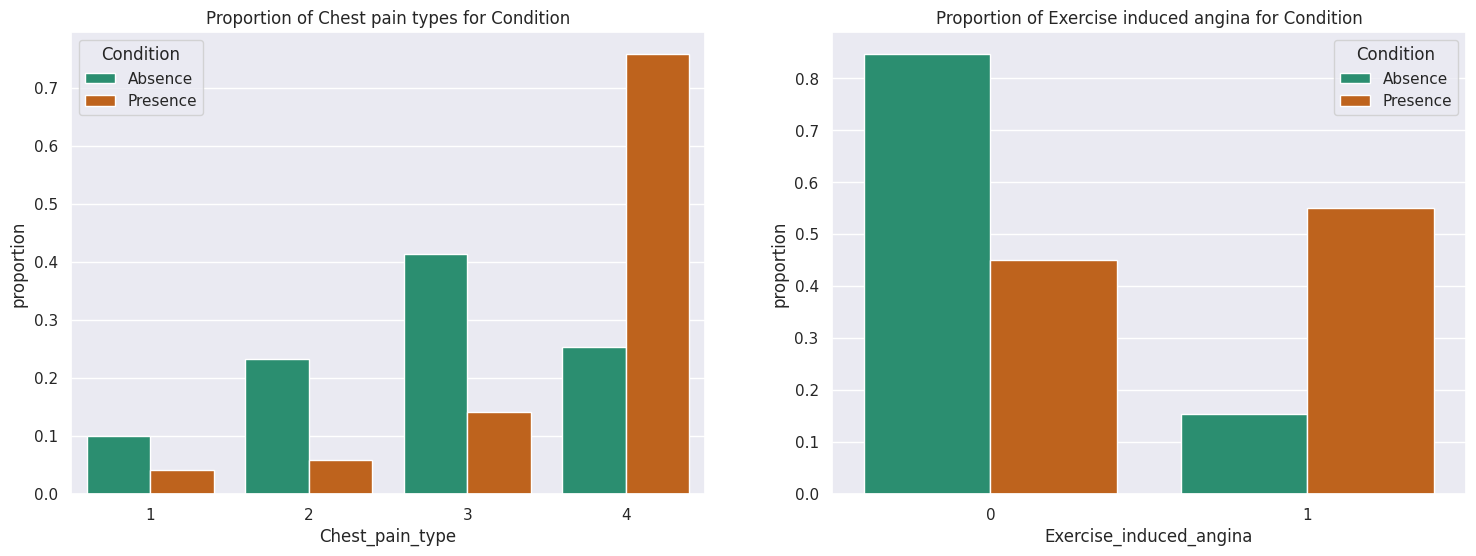

In [ ]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()


symptoms_features_condition(df);

<ipython-input-27-49ba99fdf905>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-49ba99fdf905>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-49ba99fdf905>:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

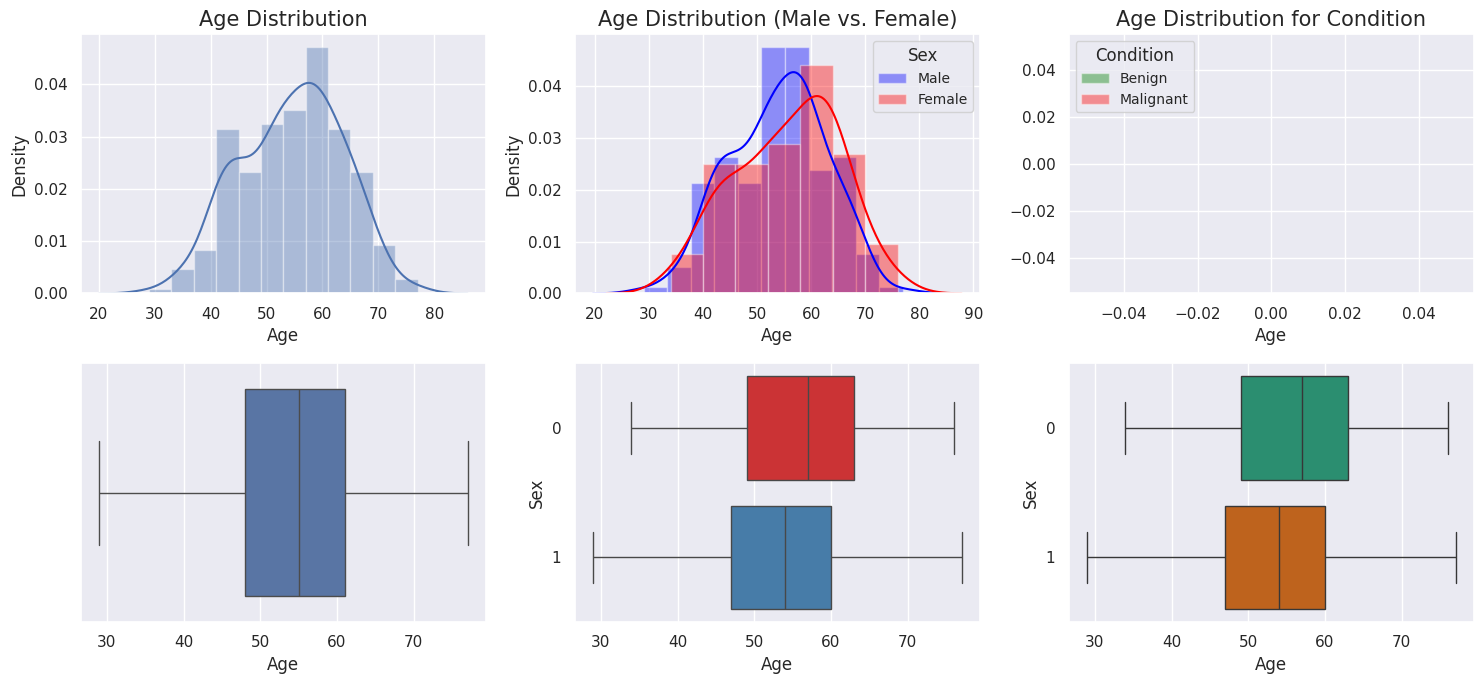

In [ ]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age'])
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()


age_distribution(df)


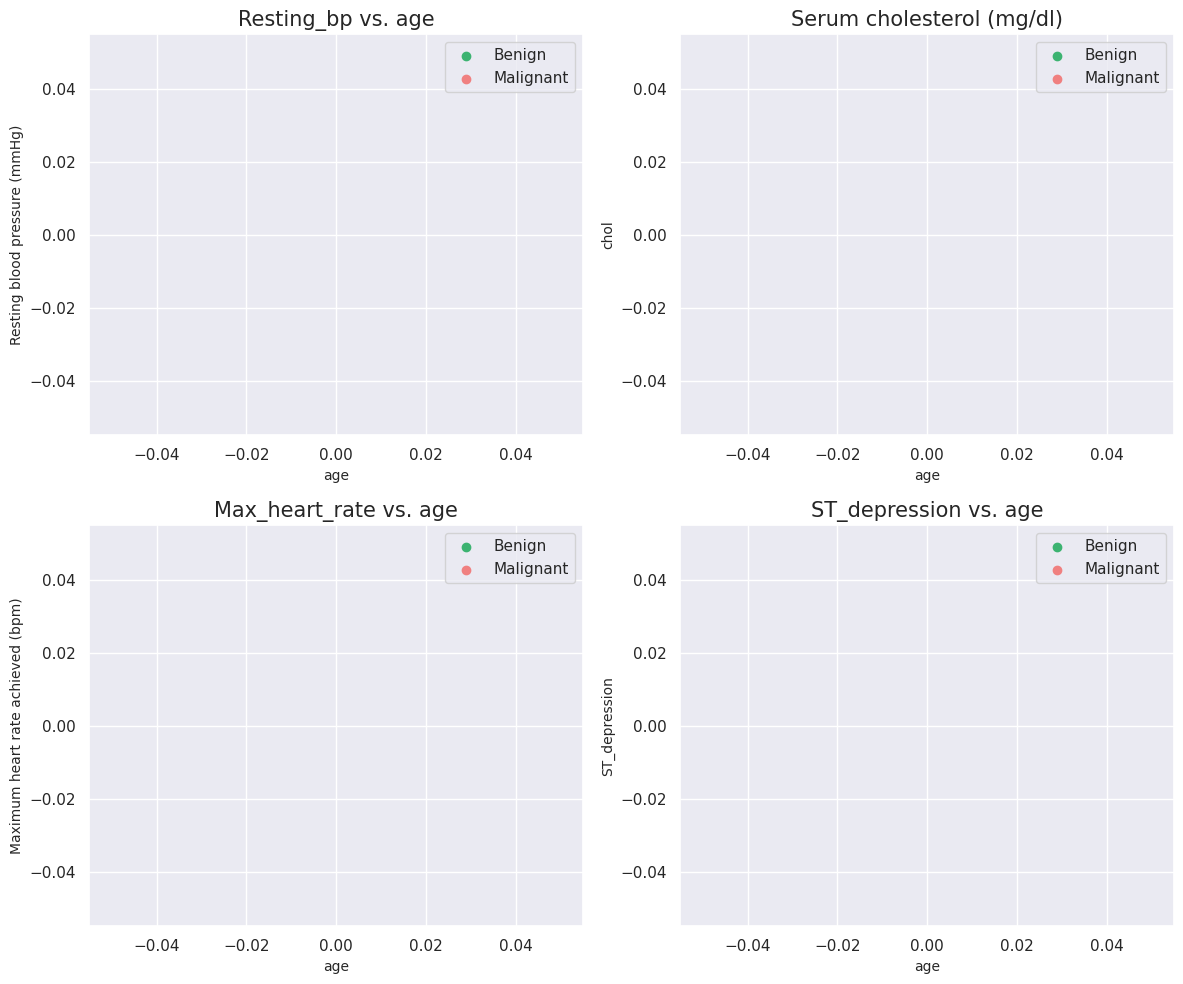

In [ ]:
def numeric_features_vs_age(data):
    """
    Effects of features for heart disease by age
    """
    benign = data.Condition==0
    malignant = data.Condition==1

    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]

    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Resting blood pressure (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


    # Serum Cholesterol (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)


    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)

    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);


<ipython-input-29-0ef1e2bf5767>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



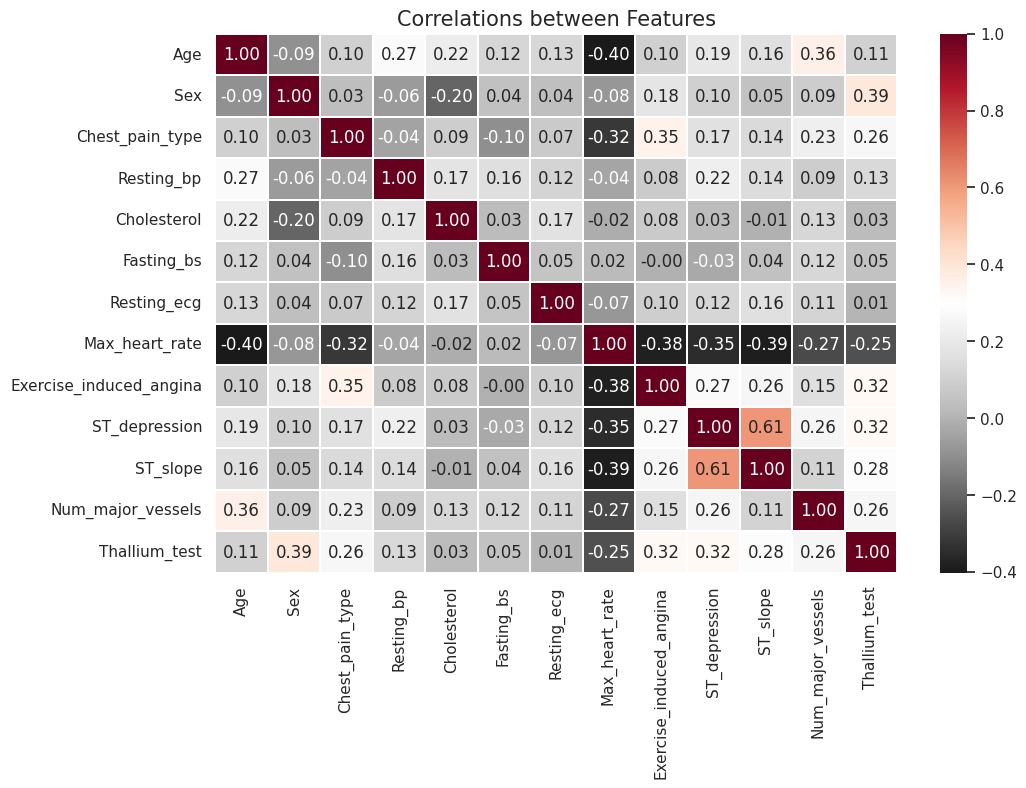

In [ ]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()


correlation_heatmap(df);

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bs', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')

In [ ]:
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# X=df.drop('Condition', axis=1)
# y=df['Condition']

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# # using the train test split function
# X_train, X_test, y_train, y_test = train_test_split(X,y ,
#                                    random_state=42,
#                                    test_size=0.25,
#                                    shuffle=True)

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# For Model Evaluation
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve, auc (having problems with this import)
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bs', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Condition']= label_encoder.fit_transform(df['Condition'])

df['Condition'].unique()


array([1, 0])

In [ ]:
df

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
def get_train_test_split(data):
    """
    Split into train and test set:
    - X = independent variables.
    - y = dependent variable.
    - Setup train_size, 80%, and test_size, 20%, of the dataset.
    """
    X = data.drop(['Condition'], axis=1)
    y = data.Condition
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)
    print(f'Shape of X_train {X_train.shape}')
    print(f'Shape of X_test {X_test.shape}')
    print(f'Shape of y_train {y_train.shape}')
    print(f'Shape of y_test {y_test.shape}')
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_train_test_split(df);

Shape of X_train (216, 13)
Shape of X_test (54, 13)
Shape of y_train (216,)
Shape of y_test (54,)


In [ ]:
# Normalize the dataset
def get_normalization(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized


X_train = get_normalization(X_train);
X_test = get_normalization(X_test);

In [ ]:
# Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [ ]:
def get_model_accuracy(model, X_test, y_test):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    model_acc = model.score(X_test, y_test)
    return model_acc

In [ ]:
# Accuracy in Logistic Regression model
logreg_acc = get_model_accuracy(logreg, X_test, y_test)
print(f'Logistic Regression Accuracy: {logreg_acc:.4}')
print()

# Predict class for X_test
y_pred_logreg = logreg.predict(X_test)

# Classification Report of logistic regression model
print(classification_report(y_pred_logreg, y_test))

Logistic Regression Accuracy: 0.9074

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.86      0.90      0.88        20

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.90        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
def get_best_parameters_GridSearchCV(model, params, X_train, y_train):
    clf = GridSearchCV(model, params, cv=5)
    clf.fit(X_train, y_train)

    best_params = clf.best_params_
    print(f'Best Parameters in {model}: {best_params}')
    print()

    best_estimator = clf.best_estimator_
    return best_estimator

In [ ]:
params_logreg = {'penalty': ['l1', 'l2', 'elasticnet'],
                 'C': np.logspace(-4, 4, 20),
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# Build and fit parameter tuned Logistic Regression model
logreg_gscv = get_best_parameters_GridSearchCV(logreg, params_logreg, X_train, y_train)
logreg_gscv = logreg_gscv.fit(X_train, y_train)

# Accuracy test score for logreg_cv
logreg_gscv_acc = get_model_accuracy(logreg_gscv, X_test, y_test)
print(f'Logistic Regression Model with GridSearchCV Accuracy: {logreg_gscv_acc:.4}')
print()

# Make prediction on test dataset
y_pred_logreg_gscv = logreg_gscv.predict(X_test)

# Classification Report of logreg_cv
print(classification_report(y_pred_logreg_gscv, y_test))

Best Parameters in LogisticRegression(): {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression Model with GridSearchCV Accuracy: 0.8519

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.90      0.76      0.83        25

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



In [ ]:
# Build and fit Support Vestor Classification model
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

# Accuracy score for svm_model
svm_acc = get_model_accuracy(svm_model, X_test, y_test)
print(f'SVM Accuracy: {svm_acc:.4}')
print()

# Predict class for X_test
y_pred_svm = svm_model.predict(X_test)

# Classification Report of svm_model
print(classification_report(y_pred_svm, y_test))

SVM Accuracy: 0.8148

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.76      0.76      0.76        21

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [ ]:
# Build and fit Support Vestor Classification model
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

# Accuracy score for svm_model
svm_acc = get_model_accuracy(svm_model, X_test, y_test)
print(f'SVM Accuracy: {svm_acc:.4}')
print()

# Predict class for X_test
y_pred_svm = svm_model.predict(X_test)

# Classification Report of svm_model
print(classification_report(y_pred_svm, y_test))

SVM Accuracy: 0.8148

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.76      0.76      0.76        21

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [ ]:
# Build and fit Random Forest model
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

# Accuracy score for Random Forest
rf_acc = get_model_accuracy(rf_model, X_test, y_test)
print(f'RandomForestClassifier Accuracy: {rf_acc:.4}')
print()

# Predict class for X_test
y_pred_rf = rf_model.predict(X_test)

# Classification Report of Random Forest model
print(classification_report(y_pred_rf, y_test))

RandomForestClassifier Accuracy: 0.8333

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.76      0.80      0.78        20

    accuracy                           0.83        54
   macro avg       0.82      0.83      0.82        54
weighted avg       0.84      0.83      0.83        54



In [ ]:
params_rf = {'max_depth': [2, 3, 4, 5],
               'max_features': ['auto', 'sqrt', 'log2'],
               'n_estimators':[0, 10, 50],
               'random_state': [0, 10, 42]}

In [ ]:
# Build and fit Random Forest model with the best hyperparameters
rf_gscv = get_best_parameters_GridSearchCV(rf_model, params_rf, X_train, y_train)
rf_gscv = rf_gscv.fit(X_train, y_train)

# Accuracy score for rf_gscv
rf_gscv_acc = get_model_accuracy(rf_gscv, X_test, y_test)
print(f'Random Forest with GridSearchCV Accuracy: {rf_gscv_acc:.4}')
print()

# Make prediction on test dataset
y_pred_rf_gscv = rf_gscv.predict(X_test)

# Classification Report of grid_rf_model
print(classification_report(y_pred_rf_gscv, y_test))

Best Parameters in RandomForestClassifier(): {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 10}

Random Forest with GridSearchCV Accuracy: 0.7778

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.71      0.71      0.71        21

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



In [ ]:
params_svm = {'C': [0.1,1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
              'kernel': ['linear', 'poly', 'sigmoid']}

In [ ]:
# Build and fit SVM model with the best parameters
svm_gscv = get_best_parameters_GridSearchCV(svm_model, params_svm, X_train, y_train)
svm_gscv = svm_gscv.fit(X_train, y_train)

# Accuracy test score for svm_gscv
svm_gscv_acc = get_model_accuracy(svm_gscv, X_test, y_test)
print(f'SVM with GridSerchCV Accuracy: {svm_gscv_acc:.4}')
print()

# Predict class for X_test
y_pred_svm_gscv = svm_gscv.predict(X_test)

# Classification Report of svm_gscv
print(classification_report(y_pred_svm_gscv, y_test))

Best Parameters in SVC(): {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}

SVM with GridSerchCV Accuracy: 0.9259

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.86      0.95      0.90        19

    accuracy                           0.93        54
   macro avg       0.91      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



In [ ]:
svm_gscv.best_params_

AttributeError: 'SVC' object has no attribute 'best_params_'

In [ ]:
# Build and fit XGBoost model
xgb_model = XGBClassifier(eval_metric='error')
xgb_model = xgb_model.fit(X_train, y_train)

# Accuracy score for xgb_model
xgb_acc = get_model_accuracy(xgb_model, X_test, y_test)
print(f'XGBoost Classifier Accuracy: {xgb_acc:.4}')
print()

# Predict class for X_test
y_pred_xgb = xgb_model.predict(X_test)

# Classification Report of xgb_model
print(classification_report(y_pred_xgb, y_test))

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Feature Selection
# Let's use SelectFromModel with a RandomForestClassifier to select important features
rf_clf = RandomForestClassifier()  # You'll need to import RandomForestClassifier
selector = SelectFromModel(rf_clf)
selector.fit(X_train, y_train)

# Select the important features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter Tuning
# Let's use GridSearchCV to search for the best parameters for SVM
params_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1]
}

svm_model = SVC()
svm_gscv = GridSearchCV(svm_model, params_svm, cv=5)
svm_gscv.fit(X_train_selected, y_train)

# Evaluate the model with the best parameters
svm_gscv_acc = svm_gscv.score(X_test_selected, y_test)
print(f'SVM with GridSearchCV Accuracy after feature selection: {svm_gscv_acc:.4}')
print()

# Predict class for X_test
y_pred_svm_gscv = svm_gscv.predict(X_test_selected)

# Classification Report of svm_gscv
print(classification_report(y_pred_svm_gscv, y_test))

In [ ]:
svm_gscv.best_params_